In [1]:
### Initialize essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [3]:
### Read data from file
data=pd.read_csv("Heart Disease data.csv")

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Domain Analysis

# Basic Checks

In [12]:
# First 5 columns
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
# Last 5 columns
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [16]:
#Check null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# Find mean,std,max value
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
#Find shape of dataset
data.shape

(1025, 14)

In [26]:
#Check information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
# Check for duplicates
duplicates_exist = data.duplicated().any()

if duplicates_exist:
    print("Duplicates are present in the dataset.")
else:
    print("No duplicates found.")

Duplicates are present in the dataset.


In [38]:
print(duplicates)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

In [40]:
# Remove duplicates
data_cleaned = data.drop_duplicates()

In [42]:
# Save the cleaned dataset
data_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [44]:
# Check for NaN values
nan_values = data.isna().sum()

In [46]:
# Display columns with NaN values
print(nan_values[nan_values > 0])

Series([], dtype: int64)


# Exploratory Data Analysis

In [49]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


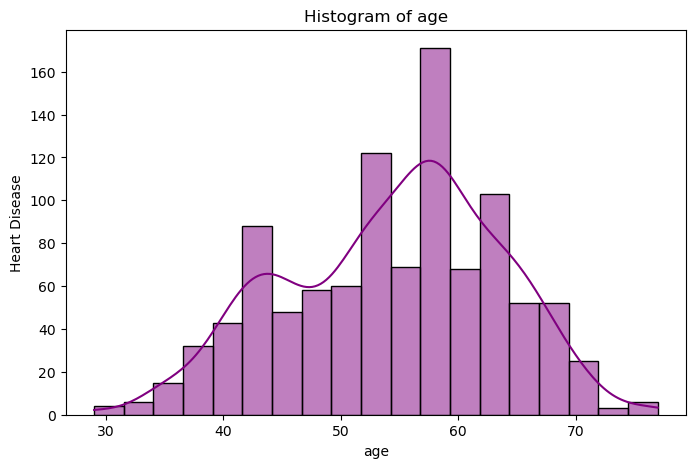

<Figure size 640x480 with 0 Axes>

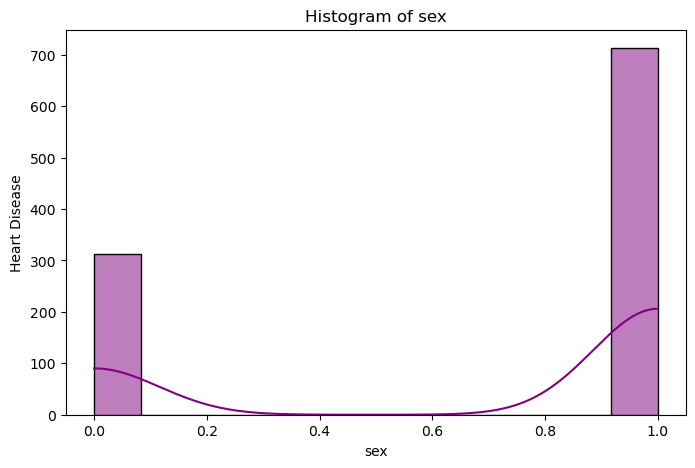

<Figure size 640x480 with 0 Axes>

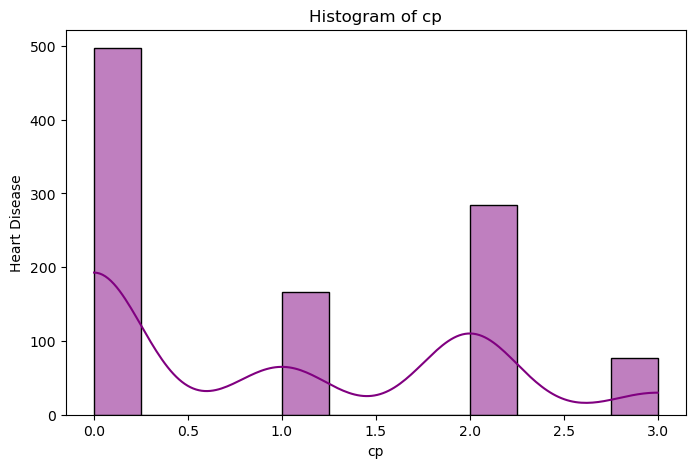

<Figure size 640x480 with 0 Axes>

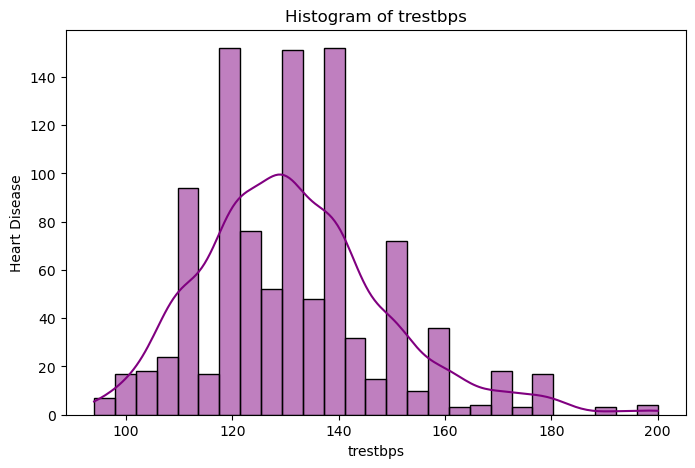

<Figure size 640x480 with 0 Axes>

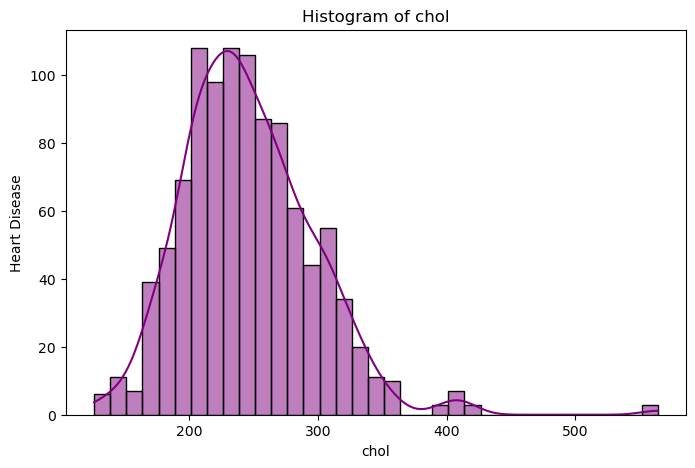

<Figure size 640x480 with 0 Axes>

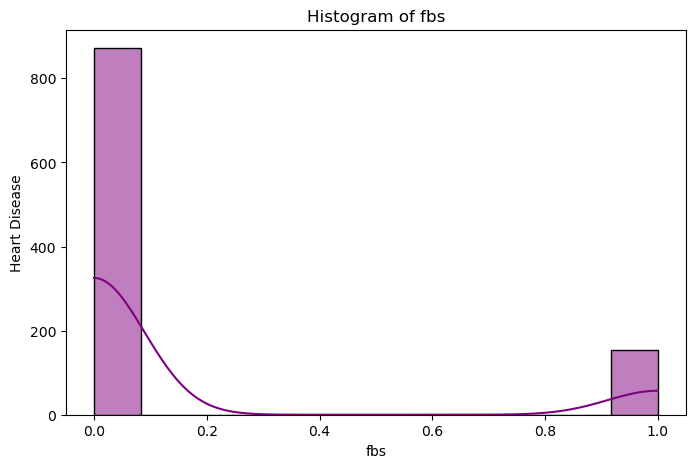

<Figure size 640x480 with 0 Axes>

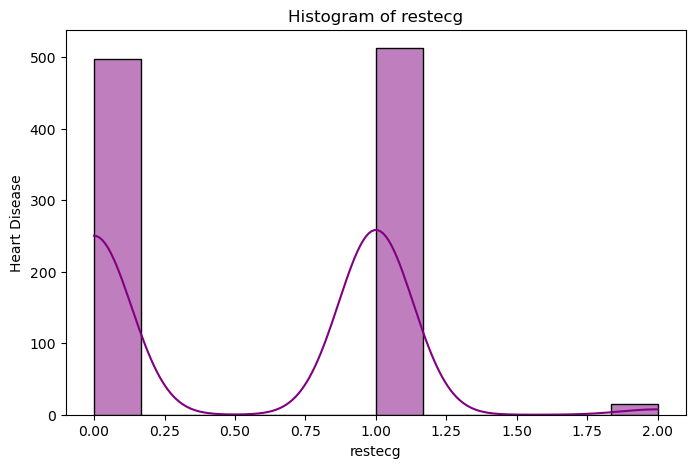

<Figure size 640x480 with 0 Axes>

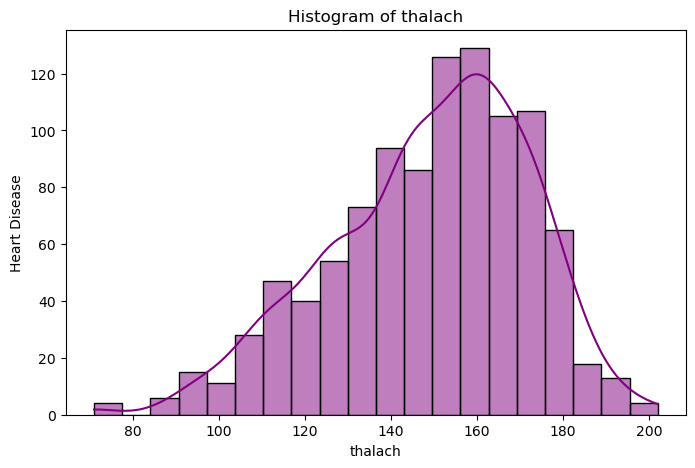

<Figure size 640x480 with 0 Axes>

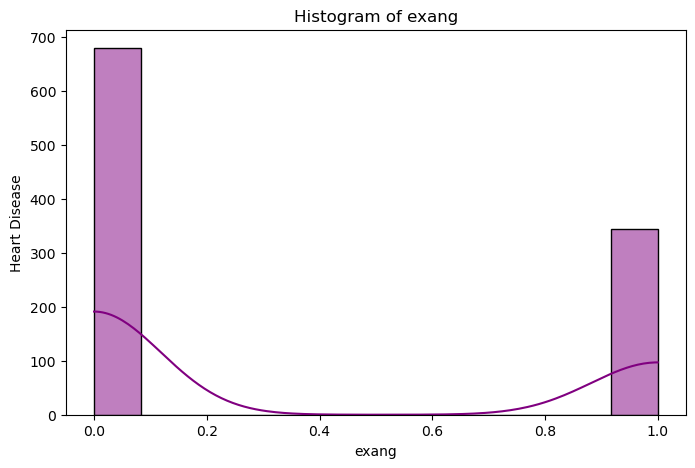

<Figure size 640x480 with 0 Axes>

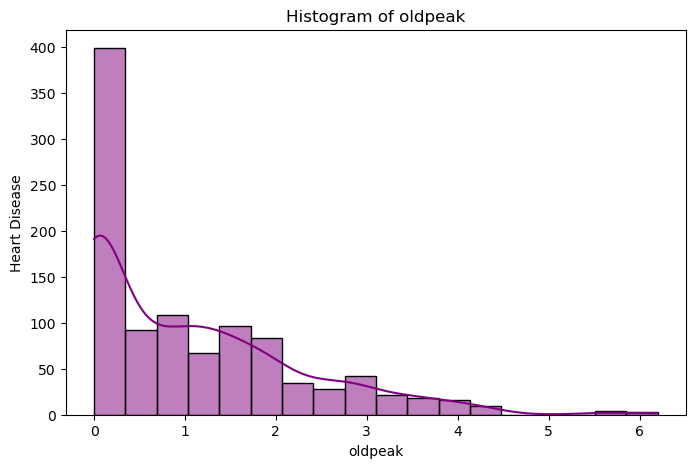

<Figure size 640x480 with 0 Axes>

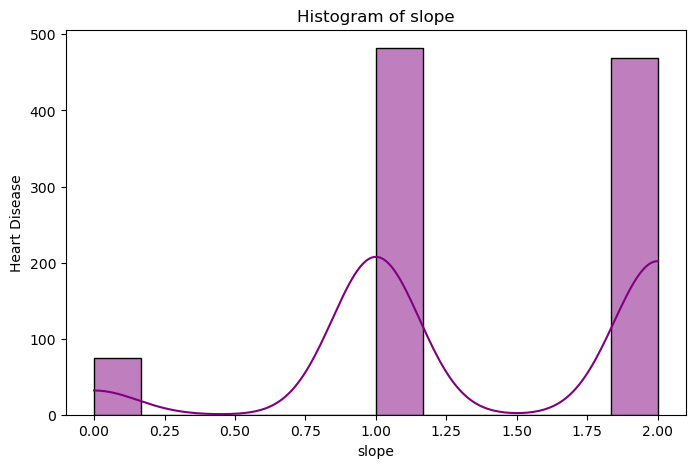

<Figure size 640x480 with 0 Axes>

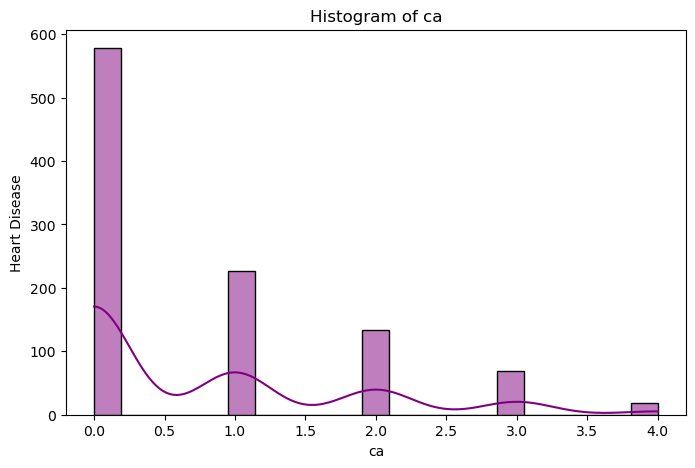

<Figure size 640x480 with 0 Axes>

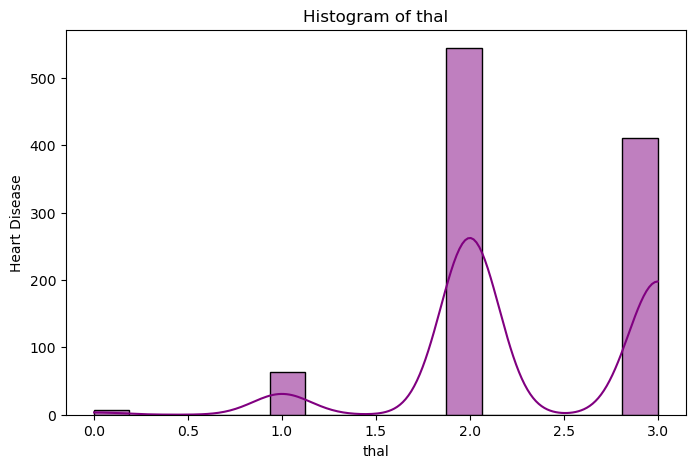

<Figure size 640x480 with 0 Axes>

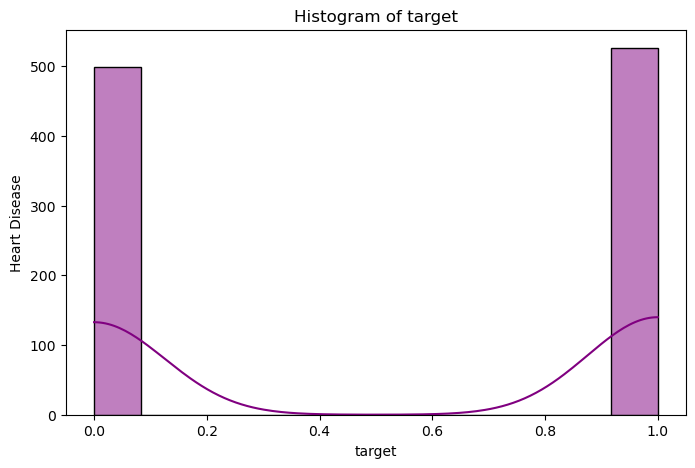

<Figure size 640x480 with 0 Axes>

In [51]:
#Univariant analysis
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,5))
        sns.histplot(data[column],kde=True,color='Purple')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Heart Disease')
        plt.show()
        plt.tight_layout()
    # For categorical columns, plot a countplot
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=data, palette='viridis')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Heart Disease')
        plt.xticks(rotation=45)
        plt.show()

In [53]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
!pip install sweetviz

In [60]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


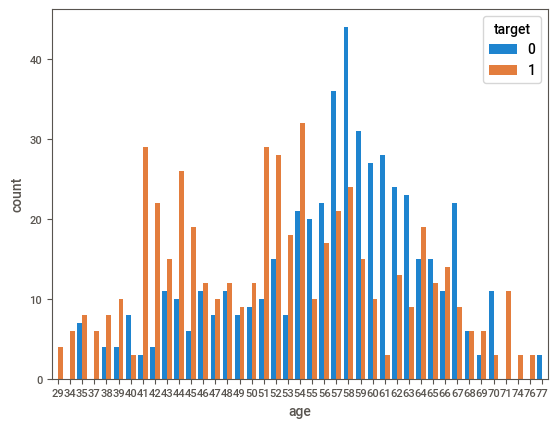

In [68]:
###Bivariate Analysis refers to plots between input variables and target variables.
sns.countplot(x='age',hue='target',data=data)
plt.show()

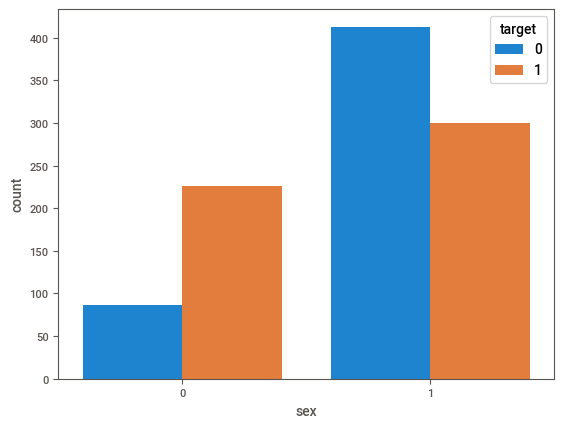

In [72]:
sns.countplot(x='sex',hue='target',data=data)
plt.show()

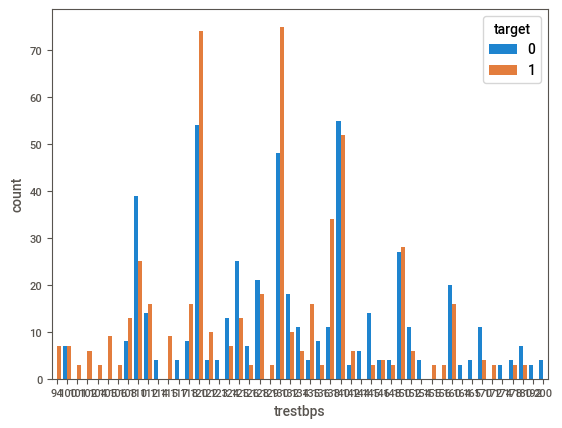

In [74]:
sns.countplot(x='trestbps',hue='target',data=data)
plt.show()

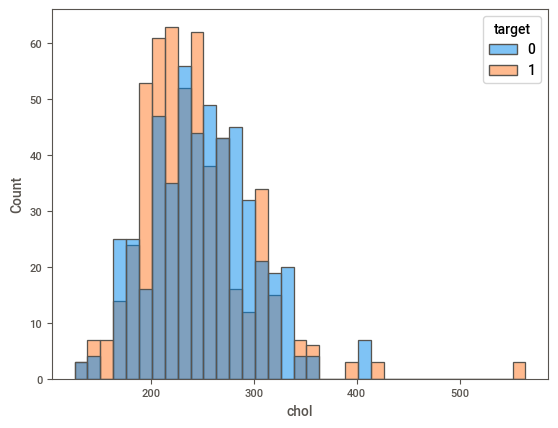

In [82]:
sns.histplot(x='chol',hue='target',data=data)
plt.show()

In [84]:
#For bivariant analysis with shortcut
!pip install autoviz

In [88]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()

filename = "cleaned_dataset.csv"
target_variable = "target"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=53940,
    max_cols_analyzed=11,
    save_plot_dir=None
)

Shape of your Data Set loaded: (302, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
Number of variables = 13

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
exang,int64,0.000000,0,0.000000,1.000000,No issue
cp,int64,0.000000,1,0.000000,3.000000,No issue
thal,int64,0.000000,1,0.000000,3.000000,Column has 2 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them.
ca,int64,0.000000,1,0.000000,4.000000,Column has 24 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
slope,int64,0.000000,0,0.000000,2.000000,No issue
oldpeak,float64,0.000000,NA,0.000000,6.200000,Column has 5 outliers greater than upper bound (4.00) or lower than lower bound(-2.40). Cap them or remove them.
restecg,int64,0.000000,0,0.000000,2.000000,No issue
sex,int64,0.000000,0,0.000000,1.000000,No issue
thalach,int64,0.000000,30,71.000000,202.000000,Column has 1 outliers greater than upper bound (215.12) or lower than lower bound(84.12). Cap them or remove them.
age,int64,0.000000,13,29.000000,77.000000,No issue


All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [90]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()

filename = "cleaned_dataset.csv"
target_variable = "target"
custom_plot_dir = "your_custom_plot_directory"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=custom_plot_dir
)


Shape of your Data Set loaded: (302, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['oldpeak']
    Integer-Categorical Columns: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'slope', 'ca', 'thal']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['sex', 'fbs', 'exang']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Cla

Error: Value 'bokeh' for key 'fig' not one of ['html', 'auto', 'png']
For help with hv.util.output call help(hv.util.output)


Row
    [0] WidgetBox
        [0] Select(name='x', options=['target'], value='target')
        [1] Select(name='y', options=['oldpeak'], value='oldpeak')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=['age', 'cp', ...], value='age')

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=['oldpeak'], value='oldpeak')

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


HoloViews(Layout)

HoloViews(Overlay, height=800, sizing_mode='fixed', width=1200)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['age', 'cp', ...], value='age')
        [1] Select(name='Y-Axis', options=['oldpeak'], value='oldpeak')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Time to run AutoViz (in seconds) = 7


In [92]:
### Multivariant analysis
sns.pairplot(data)

# Data Preprocessing and Feature Engineering

In [99]:
#Step 1 Handling the missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [101]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [103]:
## Step 2 Handling the corrupted data.
## In 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease' are zero.
data.age.replace(0,np.median(data.age))
data.sex.replace(0,np.median(data.sex))
data.cp.replace(0,np.median(data.cp))
data.trestbps.replace(0,np.median(data.trestbps))
data.chol.replace(0,np.median(data.chol))
data.fbs.replace(0,np.median(data.fbs))
data.restecg.replace(0,np.median(data.restecg))
data.thalach.replace(0,np.median(data.thalach))
data.exang.replace(0,np.median(data.exang))
data.oldpeak.replace(0,np.median(data.oldpeak))
data.slope.replace(0,np.median(data.slope))
data.ca.replace(0,np.median(data.ca))
data.thal.replace(0,np.median(data.thal))
data.target.replace(0,np.median(data.target))

0       1
1       1
2       1
3       1
4       1
       ..
1020    1
1021    1
1022    1
1023    1
1024    1
Name: target, Length: 1025, dtype: int64

In [105]:
## Step 3:-Numerical representation of string data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [119]:
# Function to find outliers using IQR
def detect_outliers_iqr(dataframe):
    outliers = {}
    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)].index
        outliers[column] = outlier_indices.tolist()
    return outliers

In [123]:
# Detect outliers
outliers_dict = detect_outliers_iqr(data)

# Display outliers for each column
for column, indices in outliers_dict.items():
    print(f"Outliers in {column}: {indices}")

Outliers in age: []
Outliers in sex: []
Outliers in cp: []
Outliers in trestbps: [29, 47, 87, 137, 151, 175, 229, 246, 257, 294, 326, 343, 396, 436, 452, 496, 508, 509, 528, 609, 624, 636, 679, 688, 837, 891, 896, 944, 971, 986]
Outliers in chol: [123, 158, 179, 192, 255, 450, 464, 481, 542, 578, 641, 665, 685, 889, 958, 996]
Outliers in fbs: [1, 4, 11, 14, 19, 27, 28, 47, 49, 50, 63, 66, 72, 74, 76, 86, 89, 94, 101, 112, 114, 123, 127, 135, 148, 154, 164, 171, 175, 176, 185, 187, 193, 195, 202, 206, 210, 228, 229, 238, 240, 244, 253, 264, 269, 275, 285, 292, 293, 294, 308, 311, 336, 338, 343, 348, 356, 363, 365, 370, 389, 390, 394, 396, 399, 405, 406, 411, 423, 428, 445, 446, 452, 455, 461, 468, 475, 476, 488, 489, 494, 496, 508, 510, 529, 552, 553, 555, 569, 570, 576, 580, 587, 605, 610, 612, 621, 622, 629, 638, 653, 665, 674, 679, 682, 686, 688, 689, 692, 708, 717, 719, 734, 742, 747, 755, 763, 767, 768, 769, 786, 788, 792, 793, 795, 801, 813, 814, 819, 837, 848, 854, 855, 885, 893,

In [125]:
# Function to remove outliers using IQR
def remove_outliers_iqr(dataframe):
    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

In [127]:
# Remove outliers
df_cleaned = remove_outliers_iqr(data)

In [129]:
def cap_outliers_iqr(dataframe):
    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe[column] = dataframe[column].clip(lower_bound, upper_bound)
    return dataframe

In [131]:
# Cap outliers
df_capped = cap_outliers_iqr(data)

In [133]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [135]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]=\
scale.fit_transform(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']])

In [137]:
data.drop(['exang'],axis=1,inplace=True)

In [139]:
corr_data=data[['age','chol','fbs','thalach','oldpeak','target','restecg']]

In [141]:
sns.heatmap(corr_data.corr(),annot=True)

<Axes: >

# Model Creation

In [149]:
X=data.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'oldpeak', 'slope', 'ca', 'thal', 'target']]
y=data.target

In [151]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.407895,0.351020,0.0,0.5,0.719008,0.222222,1.0,0.8,1.0,0.0
1,0.500000,1.0,0.000000,0.605263,0.314286,0.0,0.0,0.611570,0.688889,0.0,0.0,1.0,0.0
2,0.854167,1.0,0.000000,0.671053,0.195918,0.0,0.5,0.363636,0.577778,0.0,0.0,1.0,0.0
3,0.666667,1.0,0.000000,0.710526,0.314286,0.0,0.5,0.661157,0.000000,1.0,0.4,1.0,0.0
4,0.687500,0.0,0.000000,0.578947,0.685714,0.0,0.5,0.206612,0.422222,0.5,1.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.605263,0.387755,0.0,0.5,0.685950,0.000000,1.0,0.0,0.6,1.0
1021,0.645833,1.0,0.000000,0.407895,0.538776,0.0,0.0,0.495868,0.622222,0.5,0.4,1.0,0.0
1022,0.375000,1.0,0.000000,0.210526,0.608163,0.0,0.0,0.305785,0.222222,0.5,0.4,0.6,0.0
1023,0.437500,0.0,0.000000,0.210526,0.522449,0.0,0.0,0.644628,0.000000,1.0,0.0,0.6,1.0


In [154]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float64

In [156]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [158]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [160]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [164]:
y_pred

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [166]:
y_test


942     1.0
545     0.0
33      0.0
935     1.0
99      1.0
933     0.0
722     1.0
183     1.0
479     0.0
173     1.0
357     0.0
807     1.0
417     1.0
608     0.0
124     0.0
841     1.0
612     0.0
1004    1.0
383     0.0
833     0.0
944     0.0
692     0.0
197     1.0
517     1.0
589     0.0
337     1.0
461     1.0
1003    1.0
806     0.0
875     0.0
221     0.0
171     0.0
785     0.0
782     1.0
290     1.0
701     0.0
248     1.0
640     1.0
524     0.0
591     0.0
970     1.0
399     1.0
685     0.0
339     0.0
223     1.0
899     1.0
127     1.0
52      1.0
299     1.0
389     1.0
706     0.0
990     1.0
75      1.0
611     0.0
723     1.0
210     1.0
913     1.0
370     0.0
133     1.0
729     1.0
901     1.0
0       0.0
214     1.0
738     0.0
514     1.0
924     0.0
347     1.0
180     0.0
225     1.0
297     0.0
331     0.0
1012    0.0
781     0.0
739     0.0
231     1.0
772     0.0
850     0.0
529     1.0
446     1.0
825     1.0
355     1.0
428     0.0
260     1.0
387 

In [168]:
y_pred_prob=clf.predict_proba(X_test)

In [170]:
y_pred_prob

array([[0.01314208, 0.98685792],
       [0.97901914, 0.02098086],
       [0.98741291, 0.01258709],
       [0.02919337, 0.97080663],
       [0.01215503, 0.98784497],
       [0.9626481 , 0.0373519 ],
       [0.00947725, 0.99052275],
       [0.01146049, 0.98853951],
       [0.99452993, 0.00547007],
       [0.00458622, 0.99541378],
       [0.99436397, 0.00563603],
       [0.01132982, 0.98867018],
       [0.0268268 , 0.9731732 ],
       [0.99044996, 0.00955004],
       [0.99199353, 0.00800647],
       [0.01174081, 0.98825919],
       [0.98332795, 0.01667205],
       [0.01356703, 0.98643297],
       [0.98235711, 0.01764289],
       [0.9937306 , 0.0062694 ],
       [0.98375808, 0.01624192],
       [0.99112749, 0.00887251],
       [0.02065482, 0.97934518],
       [0.00962925, 0.99037075],
       [0.99370128, 0.00629872],
       [0.03840645, 0.96159355],
       [0.02145723, 0.97854277],
       [0.06241783, 0.93758217],
       [0.9853822 , 0.0146178 ],
       [0.99373796, 0.00626204],
       [0.

In [177]:
data.target.value_counts()

target
1.0    526
0.0    499
Name: count, dtype: int64

In [179]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [181]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[118   0]
 [  0 139]]


In [187]:
recall=recall_score(y_test,y_pred)
recall

1.0

In [189]:
precision=precision_score(y_test,y_pred)
precision

1.0

In [191]:
f1score=f1_score(y_test,y_pred)
f1score

1.0

In [193]:
acc = accuracy_score(y_test,y_pred)
acc

1.0

# Bagging using Logistic Regression

In [196]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(estimator=clf,n_estimators=20)

model_bagg.fit(X_train,y_train)

y_hat_bagg=model_bagg.predict(X_test)

In [198]:
y_pred=clf.predict(X_test)
y_pred

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [200]:
ac_train=accuracy_score(y_test,y_pred)
ac_train

1.0

Conclusion:- The accuracy of Logistic Regression is 100%

# KNN

In [205]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [209]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=14 :     # as there are 9 columns in the data
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('HeartDisease',fontsize=20)
    plotnumber+=1
plt.show()

In [211]:
X = data.drop(columns = ['target']) # Independent variables
y = data['target'] # Dependent or target varaible.

In [213]:
## scaling the data
scalar = StandardScaler()   #-3,3
X_scaled = scalar.fit_transform(X)  #z score formula used

In [215]:
X_scaled

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.4672853 ,  1.10488637],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.77995778,  1.10488637],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.77995778,  1.10488637],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.34366376, -0.53762056],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.77995778, -0.53762056],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.34366376,  1.10488637]])

In [221]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [223]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)  #classification and regration used value of k
    error_rate.append(np.mean(pred_i != y_test))

In [225]:
error_rate

[0.0,
 0.011673151750972763,
 0.05058365758754864,
 0.11673151750972763,
 0.17120622568093385,
 0.1867704280155642,
 0.20233463035019456,
 0.20622568093385213,
 0.20622568093385213,
 0.22178988326848248]

In [227]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [229]:
## This is reference code donot run this on current dataset.
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)  #work

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.11245405460403445
RMSE value for k=  3 is: 0.20372662947934486
RMSE value for k=  4 is: 0.2678455620991073
RMSE value for k=  5 is: 0.31313651129846104
RMSE value for k=  6 is: 0.3372019348010173
RMSE value for k=  7 is: 0.3590001733066566
RMSE value for k=  8 is: 0.3676318948577932
RMSE value for k=  9 is: 0.3644504549608232
RMSE value for k=  10 is: 0.3570850425689364
RMSE value for k=  11 is: 0.35108329269032035
RMSE value for k=  12 is: 0.34785178550340584
RMSE value for k=  13 is: 0.3478706304771158
RMSE value for k=  14 is: 0.3498136223709018
RMSE value for k=  15 is: 0.3503811771541592
RMSE value for k=  16 is: 0.35370382513396276
RMSE value for k=  17 is: 0.3538555333822606
RMSE value for k=  18 is: 0.3559653658600601
RMSE value for k=  19 is: 0.360450332889784


In [231]:
#let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsClassifier(n_neighbors=9)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [233]:
# Predict 
y_pred = knn1.predict(X_test)

In [238]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))  #training data may be balanced

The accuracy score is :  0.7937743190661478


In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       132
         1.0       0.76      0.85      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.80      0.79       257
weighted avg       0.80      0.79      0.79       257



In [242]:
## checking the balance of traget
sns.catplot(x='target',data=data,kind='count') # Imbalanced dataset

In [244]:
data.target.value_counts()

target
1.0    526
0.0    499
Name: count, dtype: int64

In [246]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [248]:
y_train.value_counts() 

target
1.0    401
0.0    367
Name: count, dtype: int64

In [250]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [252]:
y=np.array(y_train_smote)

In [254]:
y

array([1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1.

In [256]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({1.0: 401, 0.0: 367})
SMOTE Classes Counter({1.0: 401, 0.0: 401})


In [258]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [260]:
y_pred = knn2.predict(X_test)

In [264]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.8326848249027238


In [266]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83       132
         1.0       0.79      0.90      0.84       125

    accuracy                           0.83       257
   macro avg       0.84      0.83      0.83       257
weighted avg       0.84      0.83      0.83       257



# By using bagging base estimator is KNN


In [271]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(estimator=knn,n_estimators=20)

model_bagg.fit(X_train,y_train)

y_hat_bagg=model_bagg.predict(X_test)

In [276]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted')

In [278]:
f1_bagg

0.8006704710367467

Conclusion:- The accuracy of KNN is 80%

# SVM

In [281]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [283]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [285]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1.0: 401, 0.0: 367})
SMOTE Classes Counter({1.0: 401, 0.0: 401})


In [287]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [289]:
y_hat=svclassifier.predict(X_test)

In [291]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.8832684824902723

In [294]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       132
         1.0       0.85      0.93      0.89       125

    accuracy                           0.88       257
   macro avg       0.89      0.88      0.88       257
weighted avg       0.89      0.88      0.88       257



In [296]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X_train_smote,y_train_smote,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.925      0.9047619  0.91764706 0.90243902 0.92682927 0.95
 0.925      0.95       0.81395349 0.88888889]
Cross validation Score: 0.9104519633529344
Std : 0.0370740832298301


Conclusion:- The accuracy of SVM is 88%

# Random Forest Implementation

In [299]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
RandomForestClassifier()

RandomForestClassifier()

In [307]:
y_predict=rf_clf.predict(X_test)#testing

In [309]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       132
         1.0       1.00      0.95      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



Conclusion:- The accuracy of Random Forest Classifier is 98%

### Overall Result:

1.Random forest classifier and logistic regression gives highest accuracy value.
2.Chol given the highest priority.
3.Data is cleaned and saved.